In [2]:
#Question

import pandas as pd
import math
import numpy as np
import matplotlib
import thinkstats2
import thinkplot

In [4]:
df = pd.read_csv("basketball_players.csv")

In [5]:
df.head()

,playerID,year,stint,tmID,lgID,GP,GS,minutes,points,oRebounds,...,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,note
0,abramjo01,1946,1,PIT,NBA,47,0,0,527,0,...,0,0,0,0,0,0,0,0,0,NaN
1,aubucch01,1946,1,DTF,NBA,30,0,0,65,0,...,0,0,0,0,0,0,0,0,0,NaN
2,bakerno01,1946,1,CHS,NBA,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,baltihe01,1946,1,STB,NBA,58,0,0,138,0,...,0,0,3,10,2,1,0,0,0,NaN
4,barrjo01,1946,1,STB,NBA,58,0,0,295,0,...,0,0,0,0,0,0,0,0,0,NaN


In [168]:
#Question 2
myDF = df.loc[df['lgID'] == 'NBA']
myDF =myDF.loc[myDF['year'] == 1990]

turnOvers = myDF['turnovers']
points = myDF['points']
ftMade = myDF['ftMade']
turnOvers.dropna(inplace=True)
ftMade.dropna(inplace=True)
points.dropna(inplace=True)

print points.size
print ftMade.size
print turnOvers.size
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

415
415
415


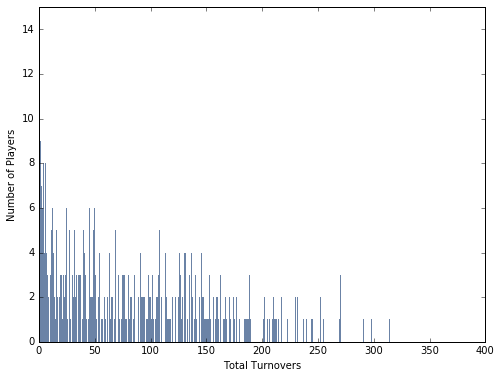

In [169]:
#Question3
hist = thinkstats2.Hist(turnOvers, label='Total Turnovers')
axis = [0, 400, 0, 15]
thinkplot.Hist(hist)
thinkplot.Show(xlabel='Total Turnovers', ylabel='Number of Players', axis= axis)

In [170]:
print turnOvers.std()
print ftMade.std()
print turnOvers.mean()
print ftMade.mean()
print SpearmanCorr(turnOvers, ftMade)

69.85582006864077
121.22415385376968
83.25060240963856
113.76626506024097
0.9291008082359609


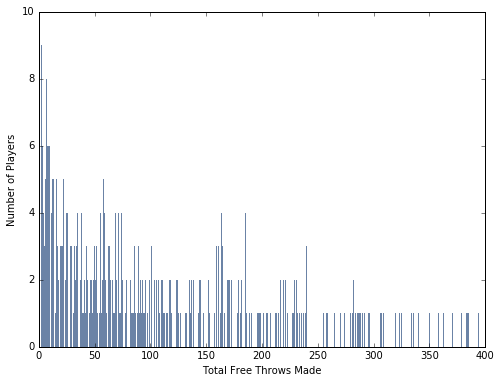

In [171]:
hist = thinkstats2.Hist(ftMade, label='Total Free Throw Mades')
axis = [0, 400, 0, 10]
thinkplot.Hist(hist)
thinkplot.Show(xlabel='Total Free Throws Made', ylabel='Number of Players', axis= axis)

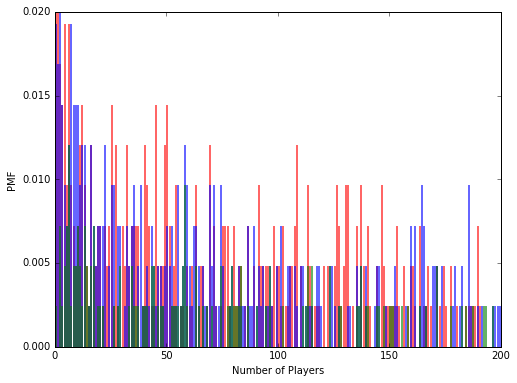

In [172]:
turnOvers_PMF = thinkstats2.Pmf(turnOvers, label='tunrOvers')
ft_PMF = thinkstats2.Pmf(ftMade, label='Free Throws')
points_PMF = thinkstats2.Pmf(points, label='Points')

thinkplot.PrePlot(3)
thinkplot.Hist(turnOvers_PMF, align='left', color='red')
thinkplot.Hist(ft_PMF, align='left', color='blue')
thinkplot.Hist(points_PMF, align='left', color='green')
thinkplot.Show(xlabel='Number of Players', ylabel='PMF',axis=[0,200,0,0.02])

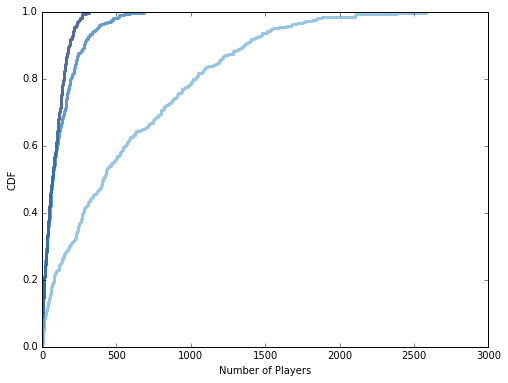

In [173]:
turnOvers_CDF = thinkstats2.Cdf(turnOvers, label='Turn Overs')
ft_CDF = thinkstats2.Cdf(ftMade, label='Free Throws')
points_CDF = thinkstats2.Cdf(points, label='Points')

thinkplot.PrePlot(3)
thinkplot.Cdfs([turnOvers_CDF, ft_CDF, points_CDF])
thinkplot.Show(xlabel='Number of Players', ylabel='CDF')

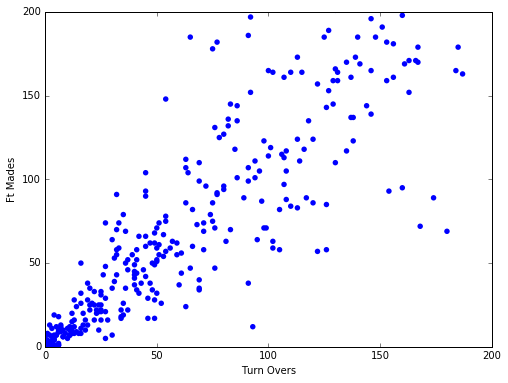

In [174]:
def ScatterPlot(turnOvers, ftMade, alpha=1.0, s=20):

    thinkplot.Scatter(turnOvers, ftMade, alpha=alpha)
    thinkplot.Show(xlabel='Turn Overs',
                     ylabel='Ft Mades',
                     xlim=[0, 200],
                     ylim=[0, 200],
                     legend=False)

ScatterPlot(turnOvers.head(400), ftMade.head(400), alpha=1.0, s=10)


In [175]:
#Question4
def PercentileRank(total, individual):
    count = 0
    for item in total:
        if item <= individual:
            count += 1

    percentile_rank = 100.0 * count / len(total)
    return percentile_rank

In [176]:
def Percentile(total, percentile_rank):
    total.sort()
    for item in total:
        if PercentileRank(total, item) >= percentile_rank:
            return item

In [177]:
mediana = turnOvers_CDF.Percentile(50)
mediana


69

In [178]:
medians = ft_CDF.Percentile(50)
medians

71

In [179]:
ftPercentiles = (ft_CDF.Percentile(25),ft_CDF.Percentile(50),ft_CDF.Percentile(75))
ftPercentiles


(22, 71, 169)

In [180]:
turnOver_percentile = (turnOvers_CDF.Percentile(25),turnOvers_CDF.Percentile(50),turnOvers_CDF.Percentile(75))
turnOver_percentile

(24, 69, 130)

In [181]:
turnOver_Sample = np.random.choice(turnOvers, 100, replace=True)
turnOvers_ranks = [turnOvers_CDF.PercentileRank(i) for i in turnOver_Sample]

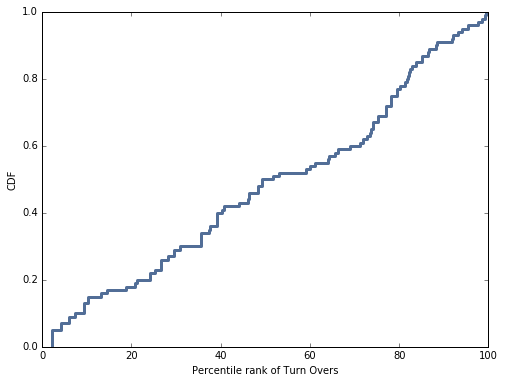

In [182]:
turnOver_rank_cdf = thinkstats2.Cdf(turnOvers_ranks)
thinkplot.Cdf(turnOver_rank_cdf)
thinkplot.Show(xlabel='Percentile rank of Turn Overs', ylabel='CDF')

In [183]:
ft_Sample = np.random.choice(ftMade, 100, replace=True)
ft_ranks = [ft_CDF.PercentileRank(i) for i in ft_Sample]

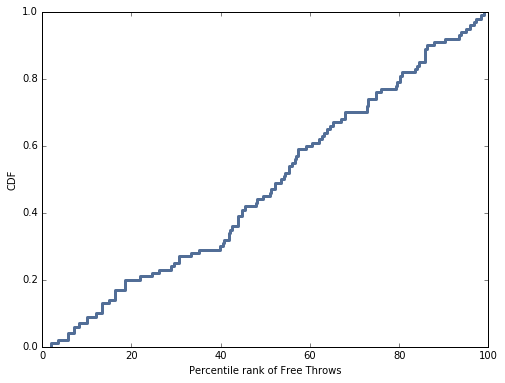

In [184]:
ft_rank_cdf = thinkstats2.Cdf(ft_ranks)
thinkplot.Cdf(ft_rank_cdf)
thinkplot.Show(xlabel='Percentile rank of Free Throws', ylabel='CDF')

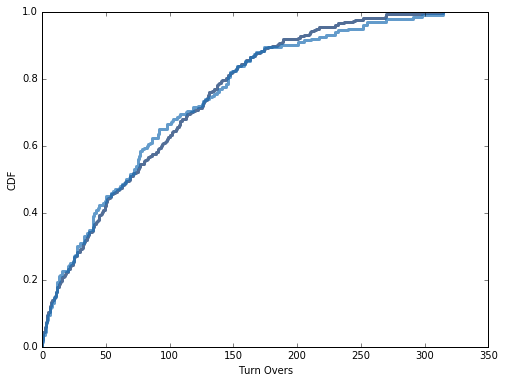

In [185]:
Turnovers_Resample = turnOvers_CDF.Sample(200)
thinkplot.Cdf(turnOvers_CDF)
thinkplot.Cdf(thinkstats2.Cdf(Turnovers_Resample, label='resample'))
thinkplot.Show(xlabel='Turn Overs', ylabel='CDF')

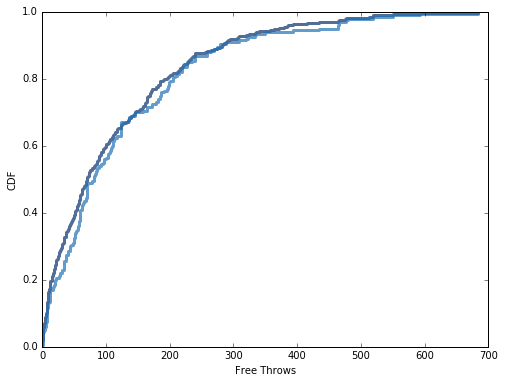

In [186]:
ft_Resample = ft_CDF.Sample(200)
thinkplot.Cdf(ft_CDF)
thinkplot.Cdf(thinkstats2.Cdf(ft_Resample, label='resample'))
thinkplot.Show(xlabel='Free Throws', ylabel='CDF')

In [187]:
#Question5

def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)


print SpearmanCorr(turnOvers, ftMade)
print SpearmanCorr(turnOvers, points)

0.9291008082359609
0.9519572930454144


In [188]:
class HypothesisTest(object):

    def __init__(self, data):
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)

    def PValue(self, iters=2000):
        self.test_stats = [self.TestStatistic(self.RunModel()) 
                           for _ in range(iters)]

        count = sum(1 for x in self.test_stats if x >= self.actual)
        return count / iters

    def TestStatistic(self, data):
        raise UnimplementedMethodException()

    def MakeModel(self):
        pass

    def RunModel(self):
        raise UnimplementedMethodException()

In [189]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(SpearmanCorr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [190]:
data = turnOvers.values, ftMade.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

In [191]:
ht.actual, ht.MaxTestStat()


(0.9291008082359609, 0.16812566715910218)